<a href="https://colab.research.google.com/github/tersiteab/ExplainableAI/blob/main/Copy_of_02_regression_boston_housing_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Price Prediction using Linear Regression



Goal is to predict median home price (in thousands) in each neighboorhood.

Dataset: [boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). It consists of 506 neighboorhood regions around Boston in 1978 with 14 different features:

    CRIM - per capita crime rate by town

    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS - proportion of non-retail business acres per town.

    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    NOX - nitric oxides concentration (parts per 10 million)

    RM - average number of rooms per dwelling

    AGE - proportion of owner-occupied units built prior to 1940

    DIS - weighted distances to five Boston employment centres

    RAD - index of accessibility to radial highways

    TAX - full-value property-tax rate per $10,000

    PTRATIO - pupil-teacher ratio by town

    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    LSTAT - % lower status of the population

    MEDV - Median value of owner-occupied homes in $1000’s



In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
boston = load_boston()
#print(boston['DESCR']) #brief description of the dataset

In [ ]:
boston_df = pd.DataFrame(boston['data'] )
boston_df.columns = boston['feature_names']
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# boston_df.columns = boston['feature_names']
# boston_df.head()

In [ ]:
#Add the target as PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


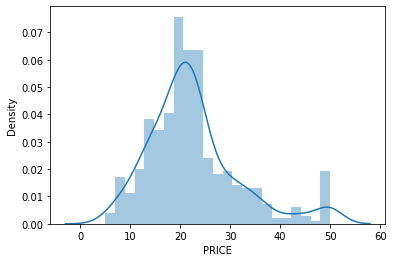

In [ ]:
sns.distplot(boston_df['PRICE']);

In [ ]:
# cccc = boston_df.iloc[:,0:13]
# cccc

In [ ]:
y = boston_df['PRICE']

X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


In [ ]:

model = LinearRegression()
model.fit( X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('labels\n',X.columns)
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('R2 for Train)', model.score( X_train, y_train ))
print('R2 for Test (cross validation)', model.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: 
 [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Intercept: 
 37.9371077418333
R2 for Train) 0.7645451026942549
R2 for Test (cross validation) 0.6733825506400183


In [ ]:
#Alternately, we can show the results in a dataframe using the zip command.
pd.DataFrame( list(zip(X.columns, model.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.121310
1,ZN,0.044466
2,INDUS,0.011342
3,CHAS,2.511246
4,NOX,-16.231253
5,RM,3.859068
6,AGE,-0.009985
7,DIS,-1.500270
8,RAD,0.242143
9,TAX,-0.011072


In [ ]:
model.intercept_

37.9371077418333

In [ ]:
y_pred = model.predict(X_test)

y_pred[0]

24.935707898576908

In [ ]:
boston_df['PRICE_REG']=model.predict(boston_df.iloc[:,0:13])
boston_df[['PRICE', 'PRICE_REG']].head()

,PRICE,PRICE_REG
0,24.0,30.290795
1,21.6,24.885615
2,34.7,30.471178
3,33.4,28.472236
4,36.2,27.811077


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

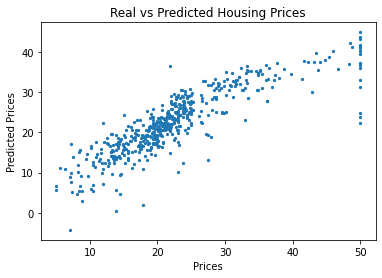

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( boston_df['PRICE'], boston_df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

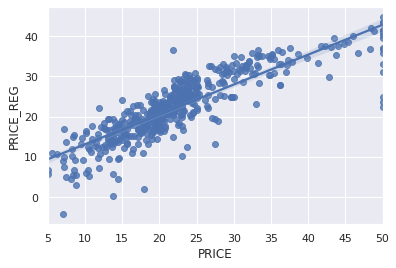

In [ ]:

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

## Graph Residuals
- Common to graph predicted - actual (error term).
- Results should show a randomly distributed error function. 
- Here we are showing train and test as different 



Text(0, 0.5, 'Residuals')

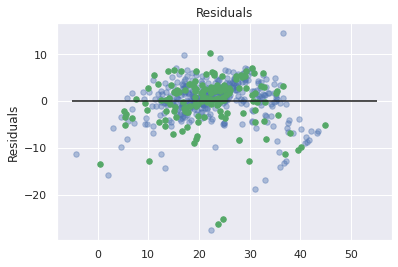

In [ ]:
#
plt.scatter( model.predict(X_train), model.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( model.predict(X_test), model.predict(X_test) - y_test,
           c ='g', s=30 )
#The expected error is 0. 
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )

## KernelSHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=5c5f7543115a00c8d3dfbda5417ccd87665f0af59a5172fb75a75344e3132d75
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap


Partial dependence plot

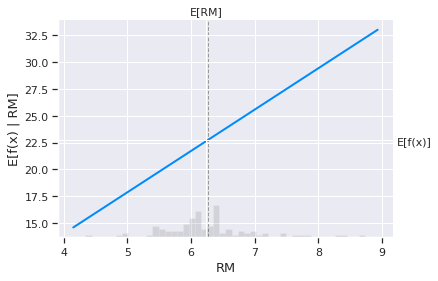

In [ ]:
X100 = shap.utils.sample(X, 100) #randomly samples 100 instances from X
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

RM - average number of rooms per dwelling

In [ ]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)# explain the training set

Permutation explainer: 507it [00:14, 34.02it/s]                         


SHAP values can be very complicated to compute (they are NP-hard in general), but linear models are so simple that we can read the SHAP values right off a partial dependence plot. When we are explaining a prediction , the SHAP value for a specific feature is just the difference between the expected model output and the partial dependence plot at the feature’s value :

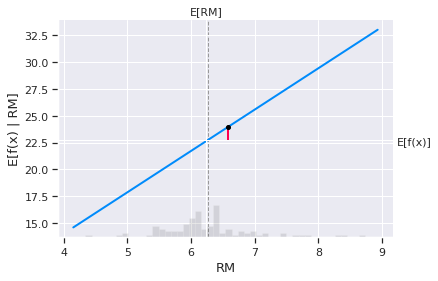

In [ ]:
# make a standard partial dependence plot
sample_ind = 0
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

Local explanation

In [ ]:
shap_values[sample_ind]

.values =
array([ 0.42298342,  0.24656633, -0.09315047, -0.15067479,  0.21409023,
        1.18542851,  0.0211386 , -0.4318871 , -2.0751695 ,  1.16406933,
        3.17437048,  0.21686559,  3.65277449])

.base_values =
22.743390308847246

.data =
array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

One the fundemental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present.

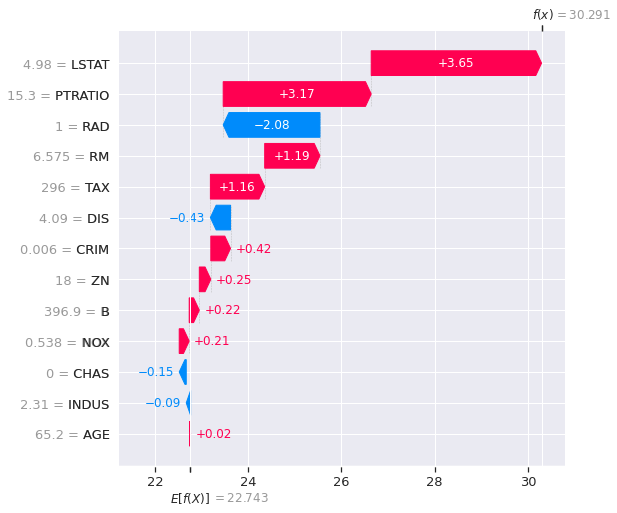

In [ ]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
# clustering = shap.utils.hclust(X_test, y_test)
shap.initjs()
shap.plots.force(shap_values[0])
# shap.plots.scatter(shap_values[:,"Age"])

Global Explanation

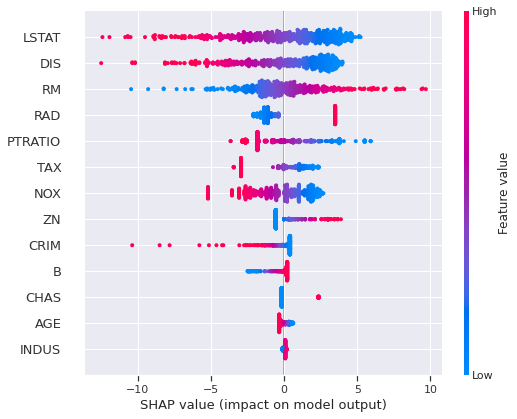

In [ ]:
shap.plots.beeswarm(shap_values, max_display=14)

CRIM - per capita crime rate by town

    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS - proportion of non-retail business acres per town.

    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    NOX - nitric oxides concentration (parts per 10 million)

    RM - average number of rooms per dwelling

    AGE - proportion of owner-occupied units built prior to 1940

    DIS - weighted distances to five Boston employment centres

    RAD - index of accessibility to radial highways

    TAX - full-value property-tax rate per $10,000

    PTRATIO - pupil-teacher ratio by town

    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    LSTAT - % lower status of the population

    MEDV - Median value of owner-occupied homes in $1000’s


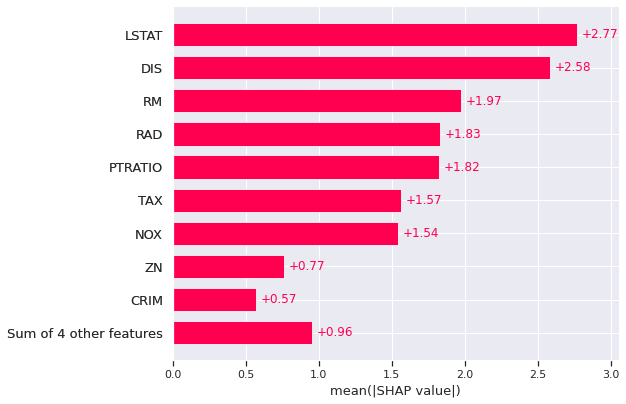

In [ ]:
shap.plots.bar(shap_values)

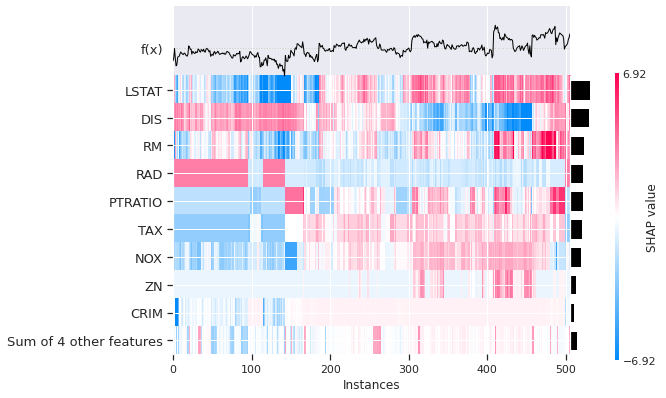

In [ ]:
shap.plots.heatmap(shap_values[:1000])



In [ ]:
# explainer = shap.KernelExplainer(model.predict,X_train)
# shap_values = explainer.shap_values(X_train)

kernelshap

Local explanation

In [ ]:
explainer_kernel = shap.KernelExplainer(model.predict, X_test)
shap_values_kernel_single = explainer_kernel.shap_values(X_test.iloc[0,:])

Using 152 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values_kernel_single = explainer_kernel.shap_values(X_test.iloc[0,:])

In [ ]:
X_test.iloc[0,:]

CRIM         0.06724
ZN           0.00000
INDUS        3.24000
CHAS         0.00000
NOX          0.46000
RM           6.33300
AGE         17.20000
DIS          5.21460
RAD          4.00000
TAX        430.00000
PTRATIO     16.90000
B          375.21000
LSTAT        7.34000
Name: 329, dtype: float64

In [ ]:
base_value = explainer_kernel.expected_value
base_value

21.78284797679221

In [ ]:
shap_values_kernel_single

array([ 0.50231268, -0.4591451 , -0.09109545, -0.1982563 ,  1.48397433,
        0.40047986,  0.50323921, -2.01586878, -1.45445385, -0.07451487,
        1.54069001,  0.18863875,  2.82685941])

In [ ]:
shap.initjs()
shap.force_plot(explainer_kernel.expected_value, shap_values_kernel_single, X_test.iloc[0,:])

kernelSHAP for test set

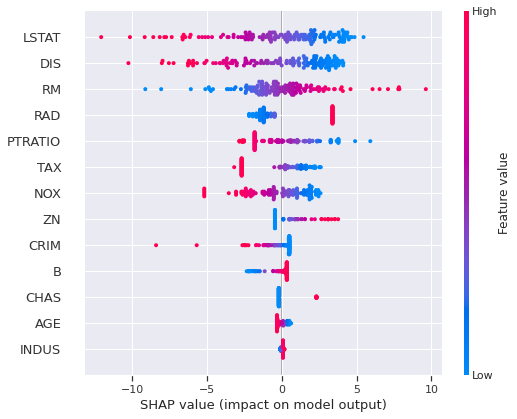

In [ ]:
shap_values_all = explainer_kernel.shap_values(X_test)
shap.summary_plot(shap_values_all, X_test)

In [ ]:
# SH_val = np.array(shap_values_kernel)
# error = y_pred_0 -( np.sum(SH_val)+base_value)
# error

In [ ]:
shap.initjs()
shap.plots.force(explainer_kernel.expected_value,shap_values_all,X_test)

In [ ]:
shap_values_test = explainer(X_test)

In [ ]:
shap_values_test[0]

.values =
array([ 0.41559319, -0.55382933, -0.0826027 , -0.15067479,  1.48012795,
        0.25153405,  0.50042655, -2.11909025, -1.34873911, -0.31952673,
        1.54596626,  0.06905984,  2.50407265])

.base_values =
22.743390308847246

.data =
array([6.7240e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01,
       6.3330e+00, 1.7200e+01, 5.2146e+00, 4.0000e+00, 4.3000e+02,
       1.6900e+01, 3.7521e+02, 7.3400e+00])

## Evaluation

Fidelity

https://papers.nips.cc/paper/8003-towards-robust-interpretability-with-self-explaining-neural-networks.pdf

This metric evaluates the correlation between the importance assigned by the interpretability algorithm
    to attributes and the effect of each of the attributes on the performance of the predictive model.
    The higher the importance, the higher should be the effect, and vice versa, The metric evaluates this by
    incrementally removing each of the attributes deemed important by the interpretability metric, and
    evaluating the effect on the performance, and then calculating the correlation between the weights (importance)
    of the attributes and corresponding model performance.

In [ ]:
def faithfulness_metric(model, x, coefs, base):
    predt = model.predict(np.transpose(x.reshape(-1,1)))
    
    ar = np.argsort(-coefs)  #argsort returns indexes of values sorted in increasing order; so do it for negated array
    pred_ts = np.zeros(x.shape[0])
    for ind in np.nditer(ar):
        x_copy = x.copy()
        x_copy[ind] = base[ind]
        x_copy_ts = model.predict(np.transpose(x_copy.reshape(-1,1)))
        pred_ts[ind] = x_copy_ts

    return -np.corrcoef(coefs, pred_ts)[0,1]



In [ ]:
columns = X_test.columns
base = X_test[columns].mean().values
x = np.array(X_test.iloc[0,:])
coefs = shap_values_test[0].values
faithfulness_metric(model, x, coefs, base)

0.9959090917086243

Monotonicity https://arxiv.org/pdf/1905.12698.pdf

 This metric measures the effect of individual features on model performance by evaluating the effect on
    model performance of incrementally adding each attribute in order of increasing importance. As each feature
    is added, the performance of the model should correspondingly increase, thereby resulting in monotonically
    increasing model performance

In [ ]:
def monotonicity_metric(model, x, coefs, base):
  predict_ = model.predict(np.transpose(x.reshape(-1,1)))
  x_copy = base.copy()
  print(x_copy)
  #find indexs of coefficients in increasing order of value
  ar = np.argsort(coefs)
  print(ar)
  pred_tss = np.zeros(x.shape[0])
  for ind in np.nditer(ar):
    print(x[ind])
    print(ind)
    x_copy[ind] = x[ind]
    print(x_copy)
    x_copy_pr = model.predict(np.transpose(x_copy.reshape(-1,1)))
    pred_tss[ind] = x_copy_pr
    print(pred_tss[ind])
  print("============================================================")
  print(pred_tss)
  print(np.diff(pred_tss[ar]))
  return np.all(np.diff(pred_tss[ar]) >= 0)

In [ ]:
base = X_test[columns].mean().values
base

array([4.20796230e+00, 1.03256579e+01, 1.12719079e+01, 7.89473684e-02,
       5.51426974e-01, 6.22922368e+00, 6.75986842e+01, 3.87092895e+00,
       1.00065789e+01, 4.23269737e+02, 1.84138158e+01, 3.47527895e+02,
       1.31477632e+01])

In [ ]:
shap_values_test[idx].values

array([ 0.41559319, -0.55382933, -0.0826027 , -0.15067479,  1.48012795,
        0.25153405,  0.50042655, -2.11909025, -1.34873911, -0.31952673,
        1.54596626,  0.06905984,  2.50407265])

In [ ]:
idx=0
x = np.array(X_test.iloc[idx,:])
coefs = shap_values_test[idx].values
print(monotonicity_metric(model, x, coefs, base))

[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 3.87092895e+00
 1.00065789e+01 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
[ 7  8  1  9  3  2 11  5  0  6  4 10 12]
5.2146
7
[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 5.21460000e+00
 1.00065789e+01 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
19.766979193488808
4.0
8
[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 5.21460000e+00
 4.00000000e+00 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
18.312525348021342
0.0
1
[4.20796230e+00 0.00000000e+00 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 5.21460000e+00
 4.00000000e+00 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
17.853380251240754
430.0
9
[4.20796230e+00 0.00000000e+00 1.12719079e+01 7.89473684e-02
 5.51426974e

In [ ]:
for idx in range(45):
  x = np.array(X_test.iloc[idx,:])
  coefs = shap_values_test[idx].values
  print(monotonicity_metric(model, x, coefs, base))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


LIME


In [ ]:
!pip install LIME

In [ ]:
coefs = shap_values_kernel
print(coefs)
ar = np.argsort(coefs)  #argsort returns indexes of values sorted in increasing order; so do it for negated array
print(ar)
print(x)

pred_ts = np.zeros(x.shape[0])
for ind in np.nditer(ar):
    x_copy = base.copy()
    print(x_copy)
    x_copy[ind] = x[ind]
    print(x_copy)
    x_copy_pr = model.predict(np.transpose(x_copy.reshape(-1,1)))
    pred_ts[ind] = x_copy_pr
    print(pred_ts[ind])
print(np.all(np.diff(pred_ts[ar]) >= 0))

[ 0.41559319 -0.55382933 -0.0826027  -0.15067479  1.48012795  0.25153405
  0.50042655 -2.11909025 -1.34873911 -0.31952673  1.54596626  0.06905984
  2.50407265]
[ 7  8  1  9  3  2 11  5  0  6  4 10 12]
[6.7240e-02 0.0000e+00 3.2400e+00 0.0000e+00 4.6000e-01 6.3330e+00
 1.7200e+01 5.2146e+00 4.0000e+00 4.3000e+02 1.6900e+01 3.7521e+02
 7.3400e+00]
[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 3.87092895e+00
 1.00065789e+01 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 5.21460000e+00
 1.00065789e+01 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
19.766979193488808
[4.20796230e+00 1.03256579e+01 1.12719079e+01 7.89473684e-02
 5.51426974e-01 6.22922368e+00 6.75986842e+01 3.87092895e+00
 1.00065789e+01 4.23269737e+02 1.84138158e+01 3.47527895e+02
 1.31477632e+01]
[4.20796230e+00 1.03256579e+01 1.

In [ ]:
coefs = shap_values_kernel
ar = np.argsort(-coefs)  #argsort returns indexes of values sorted in increasing order; so do it for negated array
pred_ts = np.zeros(x.shape[0])
for ind in np.nditer(ar):
    x_copy = x.copy()
    x_copy[ind] = base_value_features.values[ind]
    x_copy_ts = model.predict(np.transpose(x_copy.reshape(-1,1)))
    pred_ts[ind] = x_copy_ts
print(-np.corrcoef(coefs, pred_ts)[0,1])

0.9959090917086246


In [ ]:
# columns = X_test.columns
# base_value_features = X_test[columns].mean()
# x = np.array(X_test.iloc[0,:])
# faithfulness_metric(model, , shap_values_kernel, base_value_features)

In [ ]:
# faithfulness = evaluate(X_test,y_test,)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=10) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



R2: [0.60743813 0.78727793 0.53242442 0.6931245  0.75272018 0.79110506
 0.51047796 0.86796598 0.80055049 0.79824273] 
 R2_avg: 0.71 (+/- 0.23)


In [ ]:
# # def eval(X,y,)
# def evaluate(X, y, feature_weights, X_train=None, y_train=None, n_sample=100, X_train_feature_weights=None):
#         X = X.values
#         num_datapoints, num_features = X.shape
#         absolute_weights = abs(feature_weights)

#         # compute the base values of each feature
#         avg_feature_values = X.mean(axis=0)

#         faithfulnesses = []
#         for i in range(num_datapoints):
#             """
#             for each datapoint i, compute the correlation between feature weights
#             and the delta in prediction when ablating each feature with replacement
#             """
#             # original prediction
#             y_pred = np.squeeze(model.predict(np.array([X[i]])))
#             # if self.version == 'inc':
#             #     y_pred = np.mean(np.squeeze(model.predict(X)))
#             # D new predictions (ablate one feature at a time)
#             y_preds_new = np.zeros_like(X[i])
#             for j in range(num_features):
#                 # generate a mask
#                 mask = np.ones_like(X[i])
#                 mask[j] = 0
#                 # if self.version == 'inc':
#                 #     mask = 1 - mask
                
#                 x_cond = avg_feature_values
#                 x_cond[mask.astype(bool)] = X[i][mask.astype(bool)]
#                 y_preds_new[j] = model.predict([x_cond])[0]
            
#             deltas = [abs(y_pred - y_preds_new[j]) for j in range(num_features)]
#             faithfulness = np.corrcoef(absolute_weights[i], deltas)[0, 1]
#             if np.isnan(faithfulness) or not np.isfinite(faithfulness):
#                 faithfulness = 0
#             faithfulnesses.append(faithfulness)

#         return np.mean(faithfulnesses)

In [ ]:
#test
# df = pd.DataFrame([[1, 2], [3, 4]], columns = ["a", "b"])
# columns = df.columns
# print(df)

In [ ]:
# df_mean = df[columns].mean()
# df_mean.values
model.predict(X_test)[0]

24.935707898576908

In [ ]:
x = np.array(X_test.iloc[0,:])
x.shape
np.transpose(x.reshape(-1,1)).shape

(1, 13)

In [ ]:
p = model.predict(np.transpose(x.reshape(-1,1)))
p

array([24.9357079])

In [ ]:
base_value_features.values

array([4.20796230e+00, 1.03256579e+01, 1.12719079e+01, 7.89473684e-02,
       5.51426974e-01, 6.22922368e+00, 6.75986842e+01, 3.87092895e+00,
       1.00065789e+01, 4.23269737e+02, 1.84138158e+01, 3.47527895e+02,
       1.31477632e+01])

In [ ]:
#predt = model.predict(X_test)

ar = np.argsort(-shap_values_kernel) 
pred_probs = np.zeros(x.shape[0])
pred_probs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

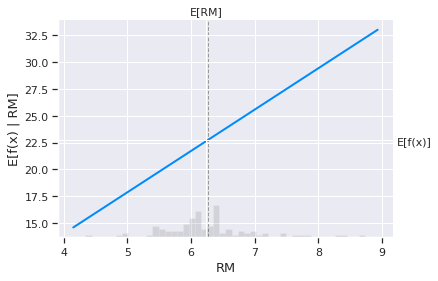

In [ ]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

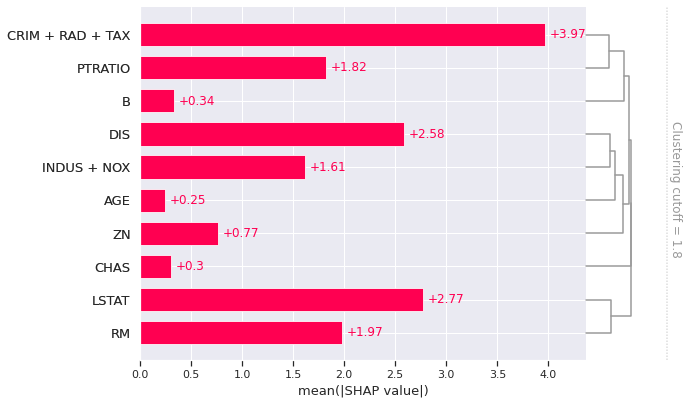

In [ ]:
clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)
